1. 랜덤 포레스트는 결정 트리의 앙상블
1. 랜덤 포레스트는 배깅을 통해 트리를 연결하고 XGBoost는 부스팅을 통해 트리를 연결한다. 
1. 랜덤 포레스트의 한계점으로 인해 그레이디언트 부스팅 개발이 촉진되었다. 

### 3.1.2 배깅
- 부트스트래핑은 중복을 허용한 샘플링을 의미
- 모든 결정 트리가 동일한 샘플로 만들어진다면 모두 비슷한 예측을 만들게 되고 앙상블한 결과도 개별 트리와 비슷해 질 것

## 3.2 랜덤 포레스트 살펴보기
### 3.2.1 랜덤 포레스트 분류 모델

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [7]:
data_path = 'handson-gb-main/Chapter02/census_cleaned.csv'

In [9]:
df_census = pd.read_csv(data_path)
X_census = df_census.iloc[:, :-1]
y_census = df_census.iloc[:, -1]

In [10]:
rf = RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)

In [11]:
scores = cross_val_score(rf, X_census, y_census, cv=5)
print('정확도: ', np.round(scores, 3))
print(f'정확도 평균: {scores.mean():.3f}')

정확도:  [0.851 0.844 0.851 0.852 0.851]
정확도 평균: 0.850


### 3.2.2 랜덤 포레스트 회귀 모델
분류 모델과 마찬가지로 부트스트랩 샘플을 사용하지만 노드 분할에 특성의 제곱근이 아니라 특성 전체를 사용한다.  
최종 예측은 다수결 투표가 아니라 모든 트리의 예측을 평균하여 만든다.  

In [12]:
data_path = 'handson-gb-main/Chapter02/bike_rentals_cleaned.csv'
df_bikes = pd.read_csv(data_path)
df_bikes.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [13]:
X_bikes = df_bikes.iloc[:, :-1]
y_bikes = df_bikes.iloc[:, -1]

In [14]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=2, n_jobs=-1)
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10)
rmse = np.sqrt(-scores)
print('RMSE: ', np.round(rmse, 3))
print(f'RMSE 평균: {rmse.mean():.3f}')

RMSE:  [ 801.486  579.987  551.347  846.698  895.05  1097.522  893.738  809.284
  833.488 2145.046]
RMSE 평균: 945.365


## 3.3 랜덤 포레스트 매개변수
### 3.3.1 oob_score
oob_score=True로 설정하면 랜덤 포레스트 모델을 훈련한 후 각 트리에서 사용되지 않은 샘플을 사용해 개별 트리의 예측 점수를 누적하여 평균을 낸다.  
oob_score 매개변수는 테스트 점수의 대안을 제공할 수 있다. 

In [15]:
rf = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

In [16]:
rf.fit(X_census, y_census)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [17]:
rf.oob_score_

0.8343109855348423

### 3.3.2 n_estimators
랜덤 포레스트는 많은 트리를 앙상블했을 때 강력한 성능을 발휘한다. 

In [18]:
rf = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)
rf.oob_score_

0.8518780135745216

In [19]:
rf = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=2, n_jobs=-1)
rf.fit(X_census, y_census)
rf.oob_score_

0.8551334418476091

### 3.3.3 warm_start
랜덤 포레스트의 트리 개수(n_estimators)를 결정하는 데 도움이 된다.  
warm_start=True로 지정하면 처음부터 시작하지 않고 트리를 앙상블에 추가할 수 있다.  
n_estimators를 100에서 200으로 바꾸면 200개의 트리를 가진 랜덤 포레스트를 만드는데 오래 걸리는데, 해당 매개변수 지정 시 이전 모델에 이어서 트리를 추가한다.  

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
oob_scores=[]
rf = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=2, n_jobs=-1, warm_start=True)

In [22]:
rf.fit(X_census, y_census)
oob_scores.append(rf.oob_score_)

In [23]:
est = 50
estimators=[est]
for i in range(9):
    est += 50
    estimators.append(est)
    rf.set_params(n_estimators=est)
    rf.fit(X_census, y_census)
    oob_scores.append(rf.oob_score_)

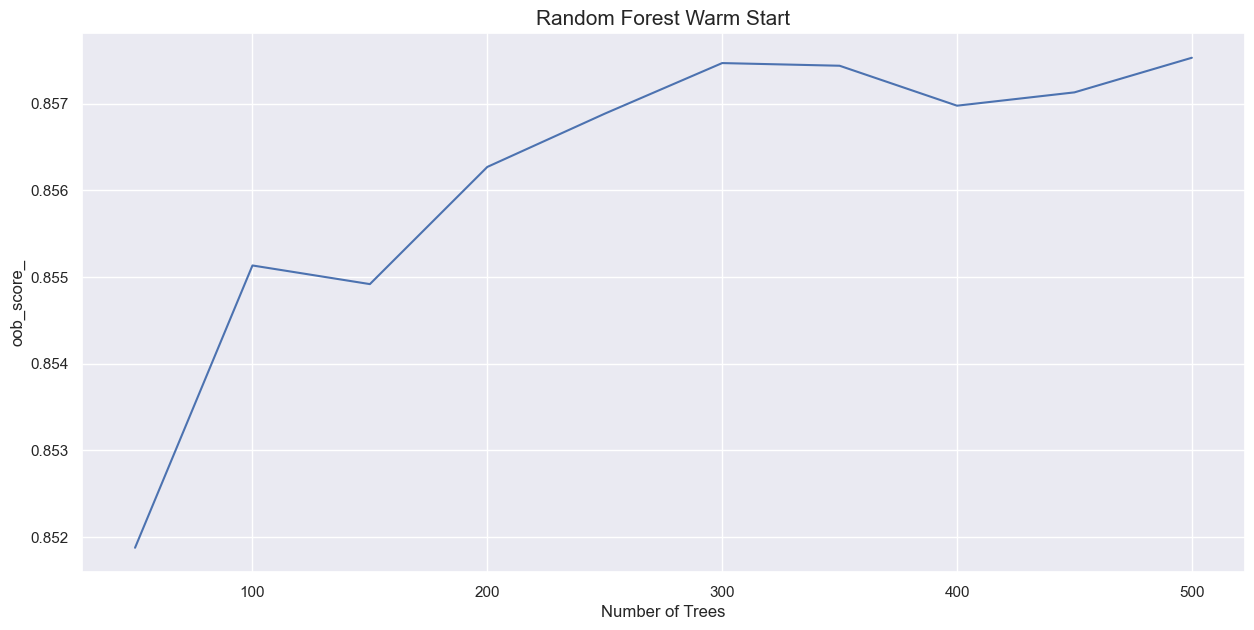

In [25]:
plt.figure(figsize=(15, 7))
plt.plot(estimators, oob_scores)
plt.xlabel('Number of Trees')
plt.ylabel('oob_score_')
plt.title('Random Forest Warm Start', fontsize=15)
plt.show()

## 3.4 랜덤 포레스트 성능 높이기 - 사례 연구

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, random_state=2)

In [27]:
rf = RandomForestRegressor(n_estimators=50, warm_start=True, 
                          n_jobs=-1, random_state=2)
scores = cross_val_score(rf, X_bikes, y_bikes, scoring='neg_mean_squared_error', cv=10) 
rmse = np.sqrt(-scores)
print('RMSE: ', np.round(rmse, 3))
print(f'RMSE 평균: {rmse.mean():.3f}')

RMSE:  [ 836.482  541.898  533.086  812.782  894.877  881.117  794.103  828.968
  772.517 2128.148]
RMSE 평균: 902.398
